<a href="https://colab.research.google.com/github/root-git/high-value-subscriber-analytics/blob/main/Customer_Analytics_Identifying_High_Value_Subscribers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Lily Shih

## Customer Analytics: Identifying High-Value Subscribers

### **Introduction:**

This project analyzes customer data to identify high-potential customers for a subscription service. It involves data cleaning, exploration, and segmentation to provide insights for marketing and retention.

---

## Business Questions

This project aimed to answer the following key business questions to inform strategies for acquiring high-potential customers:

1.  Which customer acquisition channels (original traffic sources and referring sites) demonstrated the highest profitability and efficiency?

    * By identifying the channels that bring in customers with the highest long-term value, we can allocate marketing spend more effectively and reduce acquistion costs.


2.  What are the defining characteristics of our customer base, particularly concerning demographics like gender and their subscription lifecycle status, and how do these attributes correlate with customer value?
    * Understanding these patterns enables more precise audience segmentation and personalized messaging to attract and retain high-value customers.
3.  How did the initial content a customer engaged with influence conversion and revenue generation, and which content types proved most effective in attracting valuable customers?
    * Pinpointing which content tyypes and messages resonate most helps us design acquistion journeys that better convert interest into high-value subscriptions.
4.  Synthesizing these insights, what actionable strategies can be implemented to optimize customer acquisition and identify profiles indicative of high lifetime value?
    * These strategies support data-driven targeting, smarter channel investment, and more effective retention campagins, and ultimately driving sustainable revenue growth.

## Data Source and Import

The following code block will import the raw customer data into a pandas DataFrame. The data is sourced from a Google Sheet. Please note that the actual Google Sheet link is not included in the code because it contains personal information and the data source is not publicly shared.

## Dataset Structure

The dataset contains customer information with various attributes related to their acquisition, demographics, and engagement. It includes:

*   **Rows:** Each row represents a unique customer record.
*   **Columns:** The dataset contains 63 columns, covering details such as:
    *   **Identifiers:** `Record ID - Contact`, `Email`, `Phone Number`
    *   **Acquisition Information:** `Original Traffic Source`, `First Referring Site`, `First Page Seen`
    *   **Revenue and Orders:** `Total Revenue`, `Total Number of Orders`, `Total Value of Orders`
    *   **Timestamps:** `First Deal Created Date`, `Last Activity Date`, `Create Date`, `First Order Date`, `Added To List On`
    *   **Demographics and Profile:** `First Name`, `Last Name`, `age`, `Customer Gender`, `Gender`, `Location`, `City/state`, `Zip Code`
    *   **Subscription Status:** `GA_SUBSCRIPTION_STATUS`, `Marketing contact status`
    *   **Other Details:** Various other columns containing notes, campaign information, and system details.

The dataset contains a mix of data types, including numerical (float64, int64), string (object), and timestamp data. Many columns have missing values and require cleaning and preprocessing before analysis.

In [ ]:
import pandas as pd

#Import data (Google Sheet)
#sheet_id =
sheet_name = 'all-customers'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

raw_df = pd.read_csv(sheet_url)

## Data Exploration

This section focuses on exploring the raw data to understand its structure, content, and identify any initial patterns or issues.

In [ ]:
#Preview first 5 rows of data set
columns_to_exclude = ['Email', 'Phone Number', 'First Name', 'Last Name'] # Exclude personal information columns from the preview
display(raw_df.drop(columns=columns_to_exclude).head())

,Record ID - Contact,Original Traffic Source,First Deal Created Date,Total Revenue,Time,Is there anything else you would like to tell the doctor,List all medications and supplements you are prescribed/taking,more info,persona,age,...,Added To List On.1,Company owner,Create Date.1,Last Activity Date.1,Phone Number.1,City,Country/Region,Industry,Unnamed: 61,Unnamed: 62
0,6.672841e+10,Organic Search,2024-10-11 13:10,581.00,13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.055681e+10,Direct Traffic,2024-09-30 14:10,564.00,14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.400675e+10,Offline Sources,2024-12-09 12:52,202.50,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.956198e+09,Direct Traffic,NaN,NaN,0,NaN,NaN,NaN,NaN,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.367236e+10,Other Campaigns,2025-01-25 21:11,207.75,21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Preview last 5 rows of dataset
display(raw_df.drop(columns=columns_to_exclude).tail())

,Record ID - Contact,Original Traffic Source,First Deal Created Date,Total Revenue,Time,Is there anything else you would like to tell the doctor,List all medications and supplements you are prescribed/taking,more info,persona,age,...,Added To List On.1,Company owner,Create Date.1,Last Activity Date.1,Phone Number.1,City,Country/Region,Industry,Unnamed: 61,Unnamed: 62
5275,8.304625e+10,Paid Search,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5276,7.661715e+10,Paid Search,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5277,1.018584e+11,Direct Traffic,2025-02-24 13:11,NaN,13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5278,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5279,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the initial preview of the data, we can observe the following:

*   Each row in the dataset represents a unique customer and contains various pieces of information related to their profile and interactions, including potential order information.
*   The dataset contains a mix of variable types, including categorical data (e.g., `Original Traffic Source`, `Marketing Contact Status`), geographical data (e.g., `City`, `Country/Region`), numerical data (e.g., `Total Revenue`, `Time`, `age`), and timestamp data (e.g., `First Deal Created Date`, `Last Activity Date.1`).
*   Many columns appear to have a significant number of missing values (represented as `NaN`), which will need to be addressed during the data cleaning phase.
*   There are columns that seem to be duplicates or contain redundant information (e.g., `Added To List On.1`, `Create Date.1`, `Last Activity Date.1`, `Phone Number.1`) which may require further investigation or removal.
*   Some columns contain free-text fields (e.g., `Is there anything else you would like to tell the doctor`, `List all medications and supplements you are prescribed/taking more info`) which may require natural language processing techniques if they are deemed relevant to the analysis.


In [ ]:
# Get the shape of the dataframe (number of rows, number of columns)
raw_df.shape

(5280, 63)

In [ ]:
# Get information about the dataframe, including column data types and non-null values
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 63 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Record ID - Contact                                             5278 non-null   float64
 1   Original Traffic Source                                         5278 non-null   object 
 2   First Deal Created Date                                         5212 non-null   object 
 3   Total Revenue                                                   5107 non-null   float64
 4   Time                                                            5280 non-null   int64  
 5   Email                                                           5276 non-null   object 
 6   Phone Number                                                    5271 non-null   object 
 7   First Name                                         

From the `info()` output, we can see:

*   The dataset contains 5280 rows and 63 columns.
*   There is a mix of data types, including object (likely strings), float64, int64, and datetime64[ns] (timestamp data). Some columns may have data types that don't match their content and will need to be addressed.
*   Many columns have a significant number of missing values, as indicated by the difference between the total number of rows and the non-null counts for those columns.
*   Some columns, such as 'Lead Status', 'Source store', and several others ending with '.1' or starting with 'Unnamed:', appear to have very few or zero non-null values, suggesting they may not be useful for analysis or are duplicates and may need to be removed.

## Data Cleaning

Before starting the analysis, the data needs to be cleaned. This section will focus on addressing various data quality issues, including handling missing values, identifying and removing duplicate entries, filtering out testing data, correcting invalid data values, standardizing inconsistent data formats, and ensuring correct data types for each column.

In [ ]:
# Create a dictionary with old and new column names.
new_column_names = {
    'Record ID - Contact': 'record_id',
    'Original Traffic Source': 'original_traffic_source',
    'First Deal Created Date': 'first_deal_created_timestamp',
    'Total Revenue': 'total_revenue',
    'Time': 'first_deal_create_hour',
    'Email': 'email',
    'Phone Number': 'phone_number',
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Is there anything else you would like to tell the doctor': 'notes_to_doctor',
    'List all medications and supplements you are prescribed/taking': 'medications_supplements',
    'more info': 'more_info',
    'Persona': 'persona',
    'Age': 'age',
    'Person Salary ': 'salary',
    'Location ': 'street_name',
    'City/state': 'city_state',
    'Zip Code': 'zip_code',
    'Contact owner': 'contact_owner',
    'Last Activity Date': 'last_activity_timestamp',
    'Lead Status': 'lead_status',
    'Marketing contact status': 'marketing_contact_status',
    'Create Date': 'create_timestamp',
    'Mobile Phone Number': 'mobile_phone_number',
    'GA_SUBSCRIPTION_STATUS': 'subscription_status',
    'Customer Gender': 'customer_gender',
    'Gender': 'gender',
    'Number of Associated Deals': 'number_of_associated_deals',
    'Total Number of Orders': 'total_number_of_orders',
    'Total Number of Current Orders': 'total_number_of_current_orders',
    'Campaign Lead Source': 'campaign_lead_source',
    'Record source': 'record_source',
    'Marketing contact status source name': 'marketing_contact_status_source_name',
    'Marketing contact status source type': 'marketing_contact_status_source_type',
    'Customer Source Store': 'customer_source_store',
    'Source store': 'source_store',
    'First Referring Site': 'first_referring_site',
    'Last Referring Site': 'last_referring_site',
    'Record source detail 1': 'record_source_detail_1',
    'Record source detail 2': 'record_source_detail_2',
    'Record source detail 3': 'record_source_detail_3',
    'First Page Seen': 'first_page_seen',
    'Latest Traffic Source': 'latest_traffic_source',
    'Last Touch Converting Campaign': 'last_touch_converting_campaign',
    'Original Traffic Source Drill-Down 1': 'original_traffic_source_drilldown_1',
    'Original Traffic Source Drill-Down 2': 'original_traffic_source_drilldown_2',
    'Facebook click id': 'facebook_click_id',
    'Google ad click id': 'google_click_id',
    'Total Value of Orders': 'total_value_of_orders',
    'First Order Date': 'first_order_date',
    'Added To List On': 'added_to_list_on'
}

# Rename multiple columns using the dictionary
raw_df.rename(columns=new_column_names, inplace=True) # Rename columns for easier handling and consistency

In [ ]:
import numpy as np

#Get the number of missing data points per column
missing_values_count = raw_df.isnull().sum()

#Look at the # of missing points in the first ten columns
missing_values_count[0:30]

,0
record_id,2
original_traffic_source,2
first_deal_created_timestamp,68
total_revenue,173
first_deal_create_hour,0
email,4
phone_number,9
first_name,2
last_name,4
notes_to_doctor,5051


In [ ]:
#Helpful to see what percentage of the values in the dataset were missing to get a better sense of the scale of this problem

total_cells = np.prod(raw_df.shape)
total_missing = missing_values_count.sum()

#Percent of data that is missing
percent_missing = (total_missing/total_cells)* 100
print(percent_missing)

54.5770202020202


In [ ]:
# Identify columns with 0 non-null values
null_cols = raw_df.columns[raw_df.isnull().sum().values == len(raw_df)]

# Drop the identified columns
raw_df.drop(columns=null_cols, inplace=True)

# Remove the last two empty rows
raw_df = raw_df[:-2]

In [ ]:
# Get the shape of the dataframe (number of rows, number of columns) after the drop
raw_df.shape

(5278, 47)

## Standardizing Data

This section focuses on standardizing data values to ensure consistency and facilitate easier handling and analysis. This may involve converting data to a uniform format, addressing variations in spelling or capitalization, and ensuring that similar entries are represented identically throughout the dataset.

In [ ]:
# Helper function to standardize column value to title case
def standardize_to_title_case(value):
  """
  Standardizes a string value to title case.

  Args:
    value: The input value.

  Returns:
    The value converted to title case if it's a string, otherwise the original value.
  """
  if isinstance(value, str):
    return value.title()
  return value

columns_to_standardize =['subscription_status', 'customer_gender', 'gender']

for col in columns_to_standardize:
  raw_df[col] = raw_df[col].apply(standardize_to_title_case) # Use the helper function to standardize the column value to title case

display(raw_df[['subscription_status', 'customer_gender', 'gender']].head())

,subscription_status,customer_gender,gender
0,Cancelled,Male,NaN
1,On-Hold,Male,NaN
2,Cancelled,Female,Female
3,NaN,NaN,Male
4,Queued-Activation,Male,Male


In [ ]:
# Remove rows where 'first_name' and 'last_name' are 'test'
raw_df = raw_df[~((raw_df['first_name']=='test')& (raw_df['last_name']=='test'))]

print(raw_df.shape)

(5274, 47)


In [ ]:
# Remove dashes, parentheses and spaces from the 'phone_number' column
raw_df['phone_number'] = raw_df['phone_number'].str.replace(r'[()\s-]', '', regex=True)

# Remove dashes, parentheses and spaces from the 'mobile_phone_number' column
raw_df['mobile_phone_number'] = raw_df['mobile_phone_number'].str.replace(r'[()\s-]', '', regex=True)

In [ ]:
# Merge customer_gender and gender columns
raw_df['customer_gender'] = raw_df['customer_gender'].fillna(raw_df['gender'])

print(raw_df['customer_gender'].count())

5149


In [ ]:
# Standardize subscription_status column values
raw_df['subscription_status']=raw_df['subscription_status'].str.replace('On-Hold', 'On Hold')
raw_df['subscription_status'] = raw_df['subscription_status'].str.replace('Pending-Cancel', 'Pending Cancellation')

display(raw_df['subscription_status'].unique())

array(['Cancelled', 'On Hold', nan, 'Queued-Activation', 'Active',
       'Pending Cancellation', 'Pending Activation'], dtype=object)

In [ ]:
# Convert timestamp columns to datetime objects
timestamp_columns = [
    'first_deal_created_timestamp',
    'last_activity_timestamp',
    'create_timestamp',
    'first_order_date',
    'added_to_list_on'
]

for col in timestamp_columns:
  raw_df[col]=pd.to_datetime(raw_df[col], errors='coerce')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 0 to 5277
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   record_id                             5274 non-null   float64       
 1   original_traffic_source               5274 non-null   object        
 2   first_deal_created_timestamp          5208 non-null   datetime64[ns]
 3   total_revenue                         5107 non-null   float64       
 4   first_deal_create_hour                5274 non-null   int64         
 5   email                                 5272 non-null   object        
 6   phone_number                          5267 non-null   object        
 7   first_name                            5274 non-null   object        
 8   last_name                             5272 non-null   object        
 9   notes_to_doctor                       229 non-null    object        
 10  medic

In [ ]:
# Count the number of unique values in each column
unique_counts = raw_df.nunique()

# Displayed the unique counts for each column. This helps us see which columns might not be very useful due to having too many unique values (like identifiers)
# or too few (like columns with mostly the same value or many missing values).
display(unique_counts.sort_values())

,0
campaign_lead_source,1
marketing_contact_status,1
customer_source_store,1
gender,2
customer_gender,2
contact_owner,4
marketing_contact_status_source_type,4
record_source,4
last_touch_converting_campaign,5
subscription_status,6


## Feature Engineering

This section focuses on creating new features from the existing data that can provide additional insights and improve the performance of any potential models. This will involve breaking down the `first_page_seen` and `first_referring_site` URL columns to extract UTM parameters such as campaign source, campaign medium, campaign name, and campaign content.

In [ ]:
from urllib.parse import urlparse, parse_qs

# Helper function to extract utm parameters from url
def extract_utm_parameters(url):
  """
  Extract utm_source, utm_medium, utm_campaign, and utm_content parameters from a URL.

  Args:
    url: The URL string.

  Returns:
    A dictionary containing the extracted UTM parameters.
  """
  parsed_url = urlparse(url)
  query_parameters = parse_qs(parsed_url.query)

  utm_parameters = {}
  if 'utm_source'in query_parameters:
    utm_parameters['utm_source'] = query_parameters['utm_source'][0]
  if 'utm_medium' in query_parameters:
    utm_parameters['utm_medium'] = query_parameters['utm_medium'][0]
  if 'utm_campaign' in query_parameters:
    utm_parameters['utm_campaign'] = query_parameters['utm_campaign'][0]
  if 'utm_content' in query_parameters:
    utm_parameters['utm_content'] = query_parameters['utm_content'][0]

  return utm_parameters

In [ ]:
# Fill NaN values in 'first_page_seen' with an emptyy string
raw_df['first_page_seen'] = raw_df['first_page_seen'].fillna('')
raw_df['first_referring_site'] = raw_df['first_referring_site'].fillna('')

first_page_seen_utms = raw_df['first_page_seen'].apply(extract_utm_parameters)
first_referring_site_utms = raw_df['first_referring_site'].apply(extract_utm_parameters)

# Create new columns in raw_df from the extracted UTM parameters
raw_df['first_page_seen_source'] = first_page_seen_utms.apply(lambda x: x.get('utm_source'))
raw_df['first_page_seen_medium'] = first_page_seen_utms.apply(lambda x: x.get('utm_medium'))
raw_df['first_page_seen_campaign'] = first_page_seen_utms.apply(lambda x: x.get('utm_campaign'))
raw_df['first_page_seen_content'] = first_page_seen_utms.apply(lambda x: x.get('utm_content'))

raw_df['first_referring_site_source'] = first_referring_site_utms.apply(lambda x: x.get('utm_source'))
raw_df['first_referring_site_medium'] = first_referring_site_utms.apply(lambda x: x.get('utm_medium'))
raw_df['first_referring_site_campaign'] = first_referring_site_utms.apply(lambda x: x.get('utm_campaign'))
raw_df['first_referring_site_content'] = first_referring_site_utms.apply(lambda x: x.get('utm_content'))

display(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 0 to 5277
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   record_id                             5274 non-null   float64       
 1   original_traffic_source               5274 non-null   object        
 2   first_deal_created_timestamp          5208 non-null   datetime64[ns]
 3   total_revenue                         5107 non-null   float64       
 4   first_deal_create_hour                5274 non-null   int64         
 5   email                                 5272 non-null   object        
 6   phone_number                          5267 non-null   object        
 7   first_name                            5274 non-null   object        
 8   last_name                             5272 non-null   object        
 9   notes_to_doctor                       229 non-null    object        
 10  medic

None

In [ ]:
raw_df['first_page_seen_source'] = raw_df['first_page_seen_source'].str.replace('Klaviyo', 'klaviyo') # Standardize 'Klaviyo' to lowercase 'klaviyo'

## Descriptive Statistics

This section provides descriptive statistics for key columns in the dataset. The `describe()` method is used on specific columns to summarize their central tendency, dispersion, and shape, as well as value counts for categorical data.

In [ ]:
# Describe specific columns including all data types
display(raw_df[['original_traffic_source', 'total_revenue', 'subscription_status', 'gender', 'total_number_of_orders', 'first_page_seen_source', 'first_page_seen_medium', 'first_page_seen_campaign']].describe(include='all'))

,original_traffic_source,total_revenue,subscription_status,gender,total_number_of_orders,first_page_seen_source,first_page_seen_medium,first_page_seen_campaign
count,5274,5107.000000,5120,2078,1050.000000,3328,3327,3290
unique,9,NaN,6,2,NaN,15,12,56
top,Paid Social,NaN,On Hold,Male,NaN,facebook,cpc,Manual - TOFU - Prospecting - Sales
freq,1491,NaN,2176,1580,NaN,1561,1561,633
mean,NaN,446.172111,NaN,NaN,1.811429,NaN,NaN,NaN
std,NaN,417.829304,NaN,NaN,2.185109,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,193.900000,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,268.500000,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,598.000000,NaN,NaN,2.000000,NaN,NaN,NaN


Categorical values are not meant to have calculations performed on them, so 'NaN' in some of rows can be ignored.

The output of the `describe()` method provides a summary of the specified columns:

*   For numerical columns (`total_revenue`, `total_number_of_orders`), it shows count, mean, standard deviation, minimum, maximum, and quartile values.
*   For categorical columns (`original_traffic_source`, `subscription_status`, `gender`), it shows count, unique values, the top occurring value, and its frequency.

Brief observations from the results:
*   There are 9 unique `original_traffic_source` types, with Paid Social being the most frequent (approximately a quarter of the data).
*   For `subscription_status`, the most frequent status is On-Hold, representing about 40% of the entries.
*   The `total_revenue` column shows a wide range of values, indicating variability in customer spending.
*   The `total_number_of_orders` column has a significantly lower count than the total number of rows, suggesting many customers have not placed orders yet.
---

# Exploratory Data Analysis

## 1. Which customer acquisition channels (original traffic sources and referring sites) demonstrated the highest profitability and efficiency?

The original traffic source indicates the channel through which a customer first discovered the subscription website. Analyzing the profitability of these sources can help identify the most effective acquisition channels.

In [ ]:
traffic_source_analysis = raw_df.groupby('original_traffic_source').agg(
    total_revenue=('total_revenue', 'sum'),
    average_revenue_per_customer=('total_revenue', 'mean')
).reset_index() # Group by original_traffic_source and calculate total and average revenue

# Sort by total_revenue in descending order
traffic_source_analysis = traffic_source_analysis.sort_values(by='total_revenue', ascending=False)

# Calculate the percentage of total revenue for each source
traffic_source_analysis['revenue_percentage'] = (traffic_source_analysis['total_revenue'] / traffic_source_analysis['total_revenue'].sum()) * 100

# Calculate totals
total_row = traffic_source_analysis[['total_revenue', 'revenue_percentage']].sum().to_frame().T
total_row['original_traffic_source'] = 'Total'

# Append total row to the DataFrame
traffic_source_analysis_with_total = pd.concat([traffic_source_analysis, total_row], ignore_index=True)


# Format the revenue columns
styled_traffic_source_analysis = traffic_source_analysis_with_total.style.format({
    'total_revenue': '${:,.2f}',
    'average_revenue_per_customer': '${:,.2f}',
    'revenue_percentage': '{:,.1f}%'
})

display(styled_traffic_source_analysis)

,original_traffic_source,total_revenue,average_revenue_per_customer,revenue_percentage
0,Paid Social,"$733,036.31",$504.15,32.2%
1,Direct Traffic,"$590,529.65",$497.08,25.9%
2,Paid Search,"$471,495.91",$455.55,20.7%
3,Other Campaigns,"$192,803.79",$304.11,8.5%
4,Organic Search,"$137,937.84",$487.41,6.1%
5,Offline Sources,"$91,837.52",$294.35,4.0%
6,Referrals,"$39,863.25",$276.83,1.7%
7,Organic Social,"$19,981.20",$384.25,0.9%
8,Email Marketing,"$1,115.50",$223.10,0.0%
9,Total,"$2,278,600.97",$nan,100.0%


### Insights from Original Traffic Source Analysis:

Based on the `styled_traffic_source_analysis` table and the bar plot of Total Revenue by Original Traffic Source, we can observe the following:

*   **Paid Social** is the top-performing original traffic source in terms of **Total Revenue**, contributing the largest share of overall revenue.
*   **Direct Traffic** and **Paid Search** are also significant contributors to total revenue, following Paid Social.
*   When looking at **Average Revenue per Customer**, **Paid Social** and **Direct Traffic** still rank high, suggesting that customers acquired through these channels tend to have higher average spending.
*   Sources like **Email Marketing** and **Organic Social** contribute relatively less to both total revenue and average revenue per customer, although average revenue for Organic Social is notable.
*   The "Total" row in the table confirms the overall sum of total revenue and the total percentage (100%), providing a benchmark for comparison.

These insights suggest that focusing on optimizing campaigns within **Paid Social**, **Direct Traffic**, and **Paid Search** could be key to acquiring high-potential customers who contribute significantly to revenue. Further investigation into the specific campaigns and strategies within these top sources could yield more actionable insights.

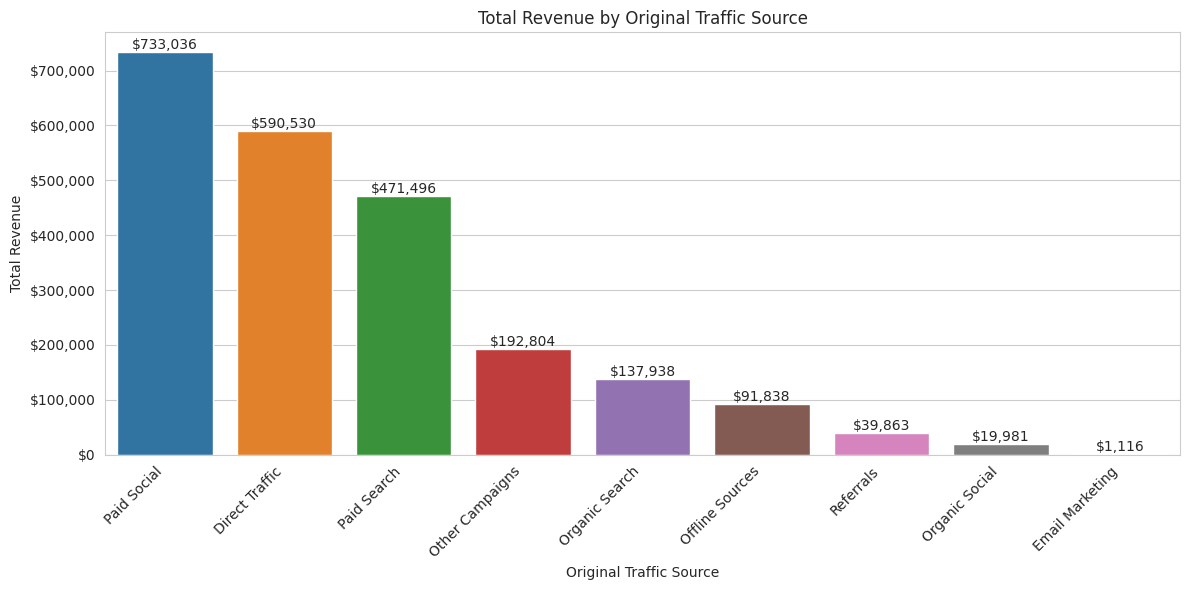

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # Import ticker for formatting

# Set the style for the plots
sns.set_style('whitegrid')

# Create a bar plot of total revenue by original traffic source
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='original_traffic_source', y='total_revenue', hue='original_traffic_source', data=traffic_source_analysis.sort_values(by='total_revenue', ascending=False), legend=False)
plt.title('Total Revenue by Original Traffic Source')
plt.xlabel('Original Traffic Source')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels with thousands separators and a dollar sign
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add total revenue at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')

plt.tight_layout()
plt.show()

This bar plot visualizes the total revenue generated by each original traffic source. By comparing the heights of the bars, we can easily identify which sources contribute the most to overall revenue, providing a clear indication of their profitability as acquisition channels.

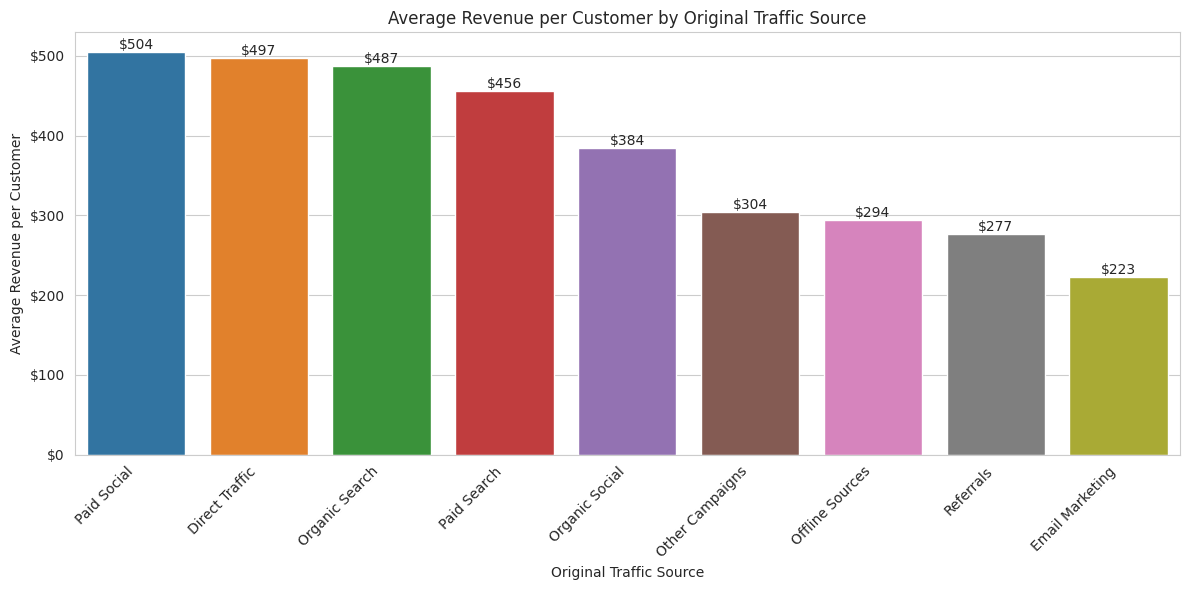

In [ ]:
# Set the style for the plots

sns.set_style('whitegrid')

# Create a bar plot of average revenue per customer
plt.figure(figsize=(12,6))
ax = sns.barplot(x='original_traffic_source', y='average_revenue_per_customer', hue='original_traffic_source', data=traffic_source_analysis.sort_values(by='average_revenue_per_customer', ascending=False), legend=False)
plt.title('Average Revenue per Customer by Original Traffic Source')
plt.xlabel('Original Traffic Source')
plt.ylabel('Average Revenue per Customer')
plt.xticks(rotation=45, ha='right')

#Format the y-axis labels with a dollar sign
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add average revenue per customer at the top of each bar
for container in ax.containers:
  ax.bar_label(container, fmt='${:,.0f}')

plt.tight_layout()
plt.show()


This bar plot visualizes the average revenue generated per customer for each original traffic source. By examining this plot, we can gain insights into the typical spending habits of customers acquired through different channels, complementing the total revenue analysis and helping to identify sources that bring in higher-value customers on average.

## 2. Which referring sites are most profitable?

Analyzing the profitability of referring sites can provide insights into which external websites or links are most effective in driving valuable customers to your platform.

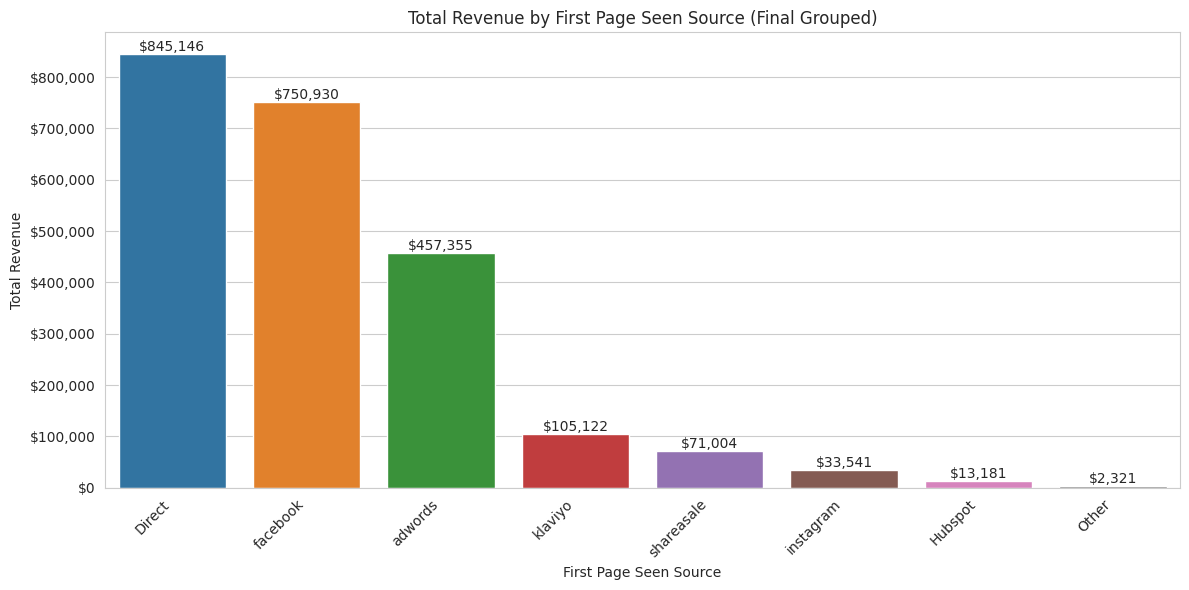

In [ ]:
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker

# Create a new column to group 'hs' sources
raw_df['first_page_seen_source_grouped'] = np.where(
    raw_df['first_page_seen_source'].str.startswith('hs', na=False),
    'Hubspot',
    raw_df['first_page_seen_source']
)

# List of sources to group into 'Other'
other_sources = ['referralcandy', 'MessageMedia', 'reddit', 'mero', 'chatgpt.com', 'brobible', 'POSTCARD']

# Create an updated grouped column including the 'Other' category
raw_df['first_page_seen_source_final_grouped'] = np.where(
    raw_df['first_page_seen_source_grouped'].isin(other_sources),
    'Other',
    raw_df['first_page_seen_source_grouped']
)

# Replace None values with 'Direct' in the final grouped column
raw_df['first_page_seen_source_final_grouped'] = raw_df['first_page_seen_source_final_grouped'].fillna('Direct')

# Calculate total revenue by the new grouped source
grouped_source_revenue = raw_df.groupby('first_page_seen_source_final_grouped')['total_revenue'].sum().reset_index()


# Sort by total revenue in descending order
grouped_source_revenue = grouped_source_revenue.sort_values(by='total_revenue', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='first_page_seen_source_final_grouped', y='total_revenue', hue='first_page_seen_source_final_grouped', data=grouped_source_revenue, legend=False)
plt.title('Total Revenue by First Page Seen Source (Final Grouped)')
plt.xlabel('First Page Seen Source')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels with thousands separators and a dollar sign
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add total revenue at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')


plt.tight_layout()
plt.show()

### Insights from Total Revenue by First Page Seen Source (Final Grouped)

Based on the bar plot of Total Revenue by First Page Seen Source (Final Grouped), we can observe the following:

*   The 'Direct' category, which includes instances where the first page seen source was not captured or was directly accessed, contributes the highest total revenue.
*   'facebook' and 'adwords' are also significant contributors to total revenue, indicating the effectiveness of paid advertising channels as initial touchpoints.
*   Other sources like 'klaviyo', 'shareasale', 'instagram', 'Hubspot', and 'Other' contribute less in terms of total revenue compared to 'Direct', 'facebook', and 'adwords'.

These insights suggest that optimizing the initial landing page experience for 'Direct' traffic and continuing to invest in 'facebook' and 'adwords' campaigns could be beneficial for maximizing total revenue. Further analysis of the average revenue and customer count for these sources will provide a more complete picture of their effectiveness.

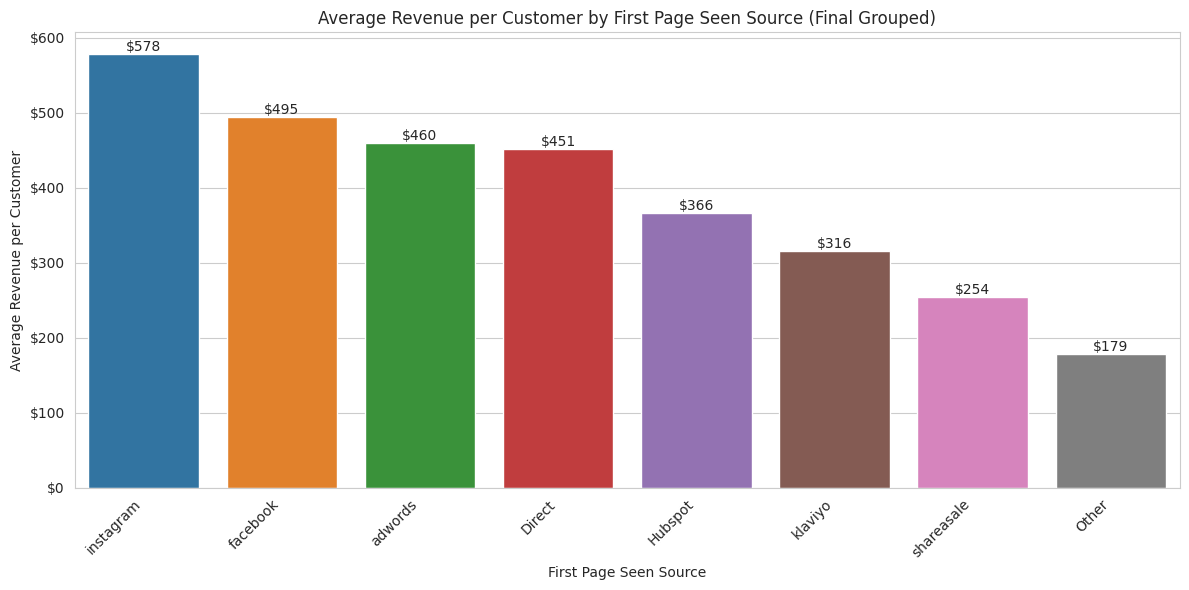

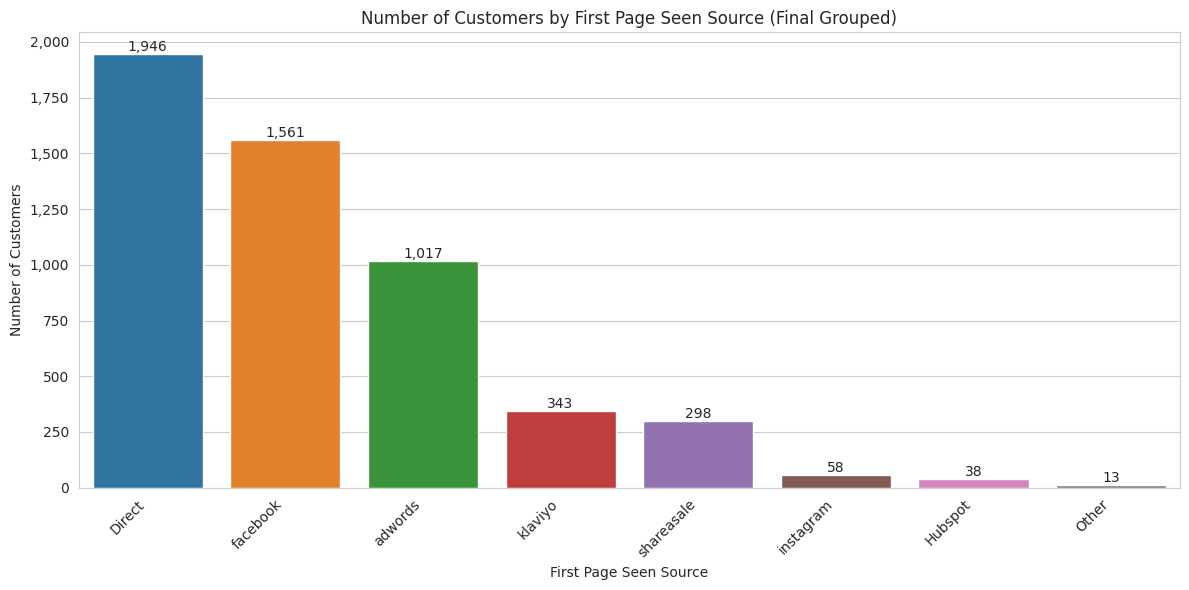

In [ ]:
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker

# Create a new column to group 'hs' sources
raw_df['first_page_seen_source_grouped'] = np.where(
    raw_df['first_page_seen_source'].str.startswith('hs', na=False),
    'Hubspot',
    raw_df['first_page_seen_source']
)

# List of sources to group into 'Other'
other_sources = ['referralcandy', 'MessageMedia', 'reddit', 'mero', 'chatgpt.com', 'brobible', 'POSTCARD']

# Create an updated grouped column including the 'Other' category
raw_df['first_page_seen_source_final_grouped'] = np.where(
    raw_df['first_page_seen_source_grouped'].isin(other_sources),
    'Other',
    raw_df['first_page_seen_source_grouped']
)

# Replace None values with 'Direct' in the final grouped column
raw_df['first_page_seen_source_final_grouped'] = raw_df['first_page_seen_source_final_grouped'].fillna('Direct')


# Calculate average revenue and customer count by the new grouped source
grouped_source_analysis = raw_df.groupby('first_page_seen_source_final_grouped').agg(
    average_revenue=('total_revenue', 'mean'),
    number_of_customers=('record_id', 'count')
).reset_index()

# Sort by average revenue in descending order for the average revenue plot
grouped_source_analysis_avg = grouped_source_analysis.sort_values(by='average_revenue', ascending=False)

# Sort by number of customers in descending order for the customer count plot
grouped_source_analysis_count = grouped_source_analysis.sort_values(by='number_of_customers', ascending=False)


# Create the bar plot for average revenue
plt.figure(figsize=(12, 6))
ax_avg = sns.barplot(x='first_page_seen_source_final_grouped', y='average_revenue', hue='first_page_seen_source_final_grouped', data=grouped_source_analysis_avg, legend=False)
plt.title('Average Revenue per Customer by First Page Seen Source (Final Grouped)')
plt.xlabel('First Page Seen Source')
plt.ylabel('Average Revenue per Customer')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels with thousands separators and a dollar sign
ax_avg.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add average revenue at the top of each bar
for container in ax_avg.containers:
    ax_avg.bar_label(container, fmt='${:,.0f}')

plt.tight_layout()
plt.show()

# Create the bar plot for number of customers
plt.figure(figsize=(12, 6))
ax_count = sns.barplot(x='first_page_seen_source_final_grouped', y='number_of_customers', hue='first_page_seen_source_final_grouped', data=grouped_source_analysis_count, legend=False)
plt.title('Number of Customers by First Page Seen Source (Final Grouped)')
plt.xlabel('First Page Seen Source')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels with thousands separators
ax_count.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add number of customers at the top of each bar
for container in ax_count.containers:
    ax_count.bar_label(container, fmt='{:,.0f}')


plt.tight_layout()
plt.show()

### Insights from Number of Customers and Average Revenue per Customer by First Page Seen Source (Final Grouped)

Analyzing the Number of Customers and Average Revenue per Customer plots alongside the Total Revenue plot for 'First Page Seen Source (Final Grouped)' reveals additional valuable insights:

*   The **Total Revenue** plot shows the overall profitability of each source, but it doesn't tell us whether that revenue comes from a large number of low-spending customers or a small number of high-spending customers.
*   The **Number of Customers** plot clarifies the volume of customers acquired through each source. For example, 'Direct', 'facebook', and 'adwords' attract the largest number of customers, aligning with their high total revenue. However, other sources might bring in fewer customers but still contribute significantly to total revenue if their average revenue per customer is high.
*   The **Average Revenue per Customer** plot provides insights into the typical spending value of customers from each source. Comparing this to the number of customers is crucial. A source might have a high average revenue (suggesting high-potential customers) even if its total revenue is not the highest, because it acquires fewer customers. Conversely, a source with high total revenue might have a lower average revenue if it brings in a very large number of low-spending customers. For instance, 'instagram' has a relatively high average revenue per customer despite a lower customer count and total revenue compared to the top sources, suggesting it might be a source for higher-value customers, albeit in smaller numbers.

By examining these three plots together, we gain a more comprehensive understanding of the performance of each 'First Page Seen Source', considering both the volume of customers and their spending habits, which is essential for identifying truly high-potential customer acquisition channels.

## 3. Customer Characteristics: Which Gender to Target?

This section explores the distribution and characteristics of customers based on their gender, with the aim of identifying potential targeting strategies.

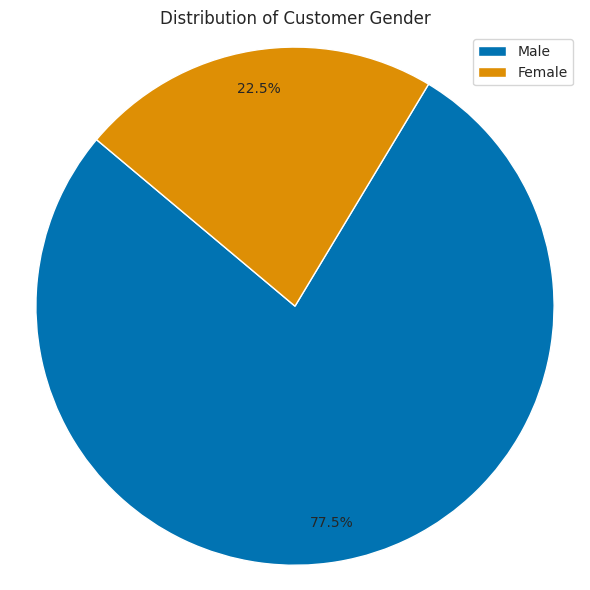

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Calculate the value counts for customer_gender
gender_counts = raw_df['customer_gender'].value_counts()

# Calculate the percentage for each gender
gender_percentages = gender_counts / gender_counts.sum() * 100

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('colorblind'), pctdistance=0.85)
plt.title('Distribution of Customer Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=gender_percentages.index, loc='best') # Add legend
plt.tight_layout()
plt.show()

### Insights from Distribution of Customer Gender

Based on the pie chart showing the distribution of customer gender, we can observe that the majority of customers in the dataset are male (approximately 77.5%), while female customers represent a smaller proportion (approximately 22.5%). This suggests that the current customer base is heavily skewed towards male individuals. This demographic insight is important when considering targeted marketing efforts or analyzing other customer characteristics, as the overall dominance of one gender could influence patterns observed in other variables.

### 4. What is the distribution of Customers by Subscription Status and Gender?

Understanding the distribution of customers across different subscription statuses and genders is important to see the composition of the customer base and identify which segments are most prevalent.

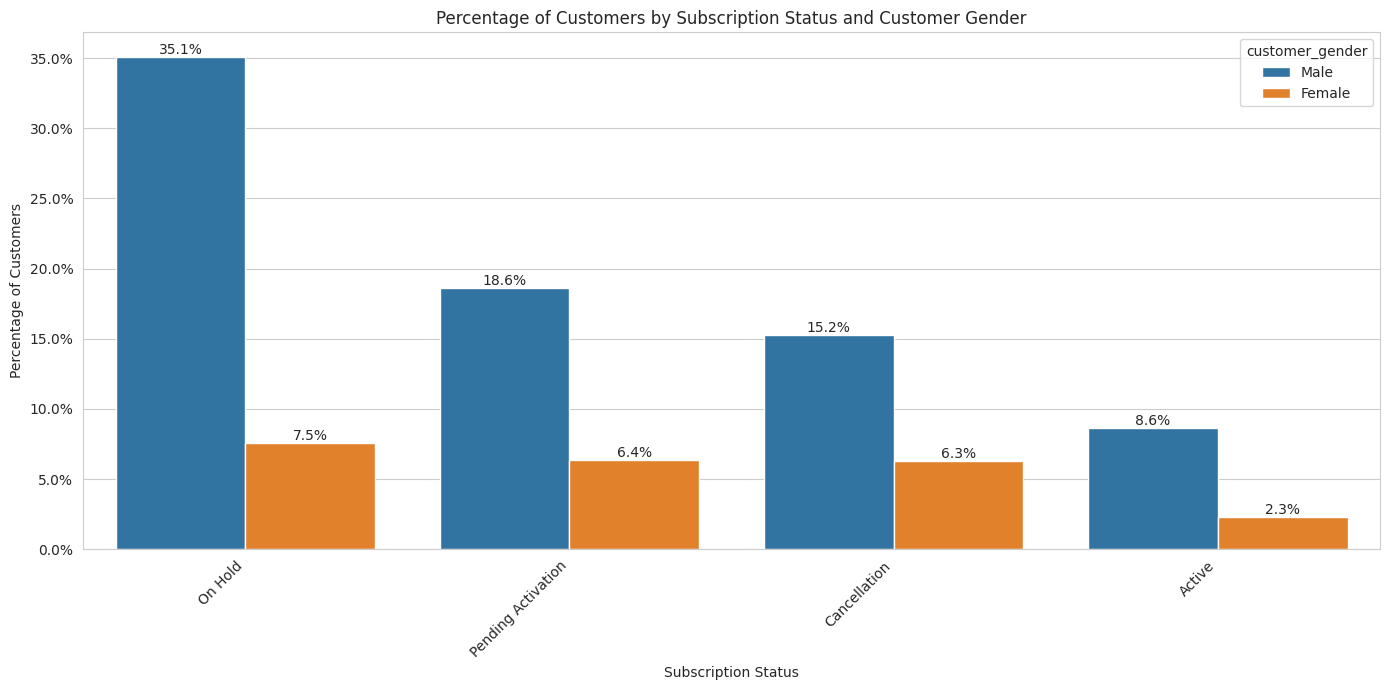

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import matplotlib.ticker as ticker # Import ticker for formatting

# Combine 'Pending-Activation' and 'Queued-Activation'
raw_df['subscription_status'] = raw_df['subscription_status'].replace('Queued-Activation', 'Pending Activation')
# Combine 'Cancelled' and 'Pending Cancellation'
raw_df['subscription_status'] = raw_df['subscription_status'].replace(['Cancelled', 'Pending Cancellation'], 'Cancellation')


# Calculate the number of customers for each combination of subscription status and gender
subscription_gender_counts = raw_df.groupby(['subscription_status', 'customer_gender']).size().reset_index(name='customer_count')

# Calculate the total number of customers
total_customers = subscription_gender_counts['customer_count'].sum()

# Calculate the percentage of total customers for each combination
subscription_gender_counts['percentage'] = (subscription_gender_counts['customer_count'] / total_customers) * 100

# Calculate the overall percentage for each subscription status to use for sorting
overall_subscription_percentage = subscription_gender_counts.groupby('subscription_status')['percentage'].sum().sort_values(ascending=False)

# Create a grouped bar plot of customer percentage
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='subscription_status',
    y='percentage',
    hue='customer_gender',
    data=subscription_gender_counts,
    order=overall_subscription_percentage.index,
    hue_order=['Male', 'Female'] # Explicitly set hue order
)
plt.title('Percentage of Customers by Subscription Status and Customer Gender')
plt.xlabel('Subscription Status')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels as percentages
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Add percentage labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.1f}%')


plt.tight_layout()
plt.show()

### Insights from Percentage of Customers by Subscription Status and Customer Gender

Based on the grouped bar plot showing the percentage of customers by subscription status and customer gender, we can observe the following:

*   The majority of customers are in the 'On Hold', 'Pending Activation', and 'Cancellation' statuses.
*   Within each subscription status, the proportion of male customers is significantly higher than female customers, reflecting the overall gender distribution in the dataset.
*   The 'On Hold' status has the largest percentage of both male and female customers.
*   The 'Active' status represents a smaller percentage of the customer base compared to the other statuses.

These insights help us understand the composition of the customer base within different subscription statuses and highlight the dominance of male customers across all statuses. This information, combined with the average revenue by subscription status and gender, provides a more complete picture of the customer segments.

### 5. How does Average Revenue Vary by Subscription Status and Gender?

This plot visualizes the average total revenue for different subscription statuses, segmented by customer gender. Analyzing this relationship is crucial for identifying high-potential customer segments based on their average spending habits within different subscription states and how this varies between genders.

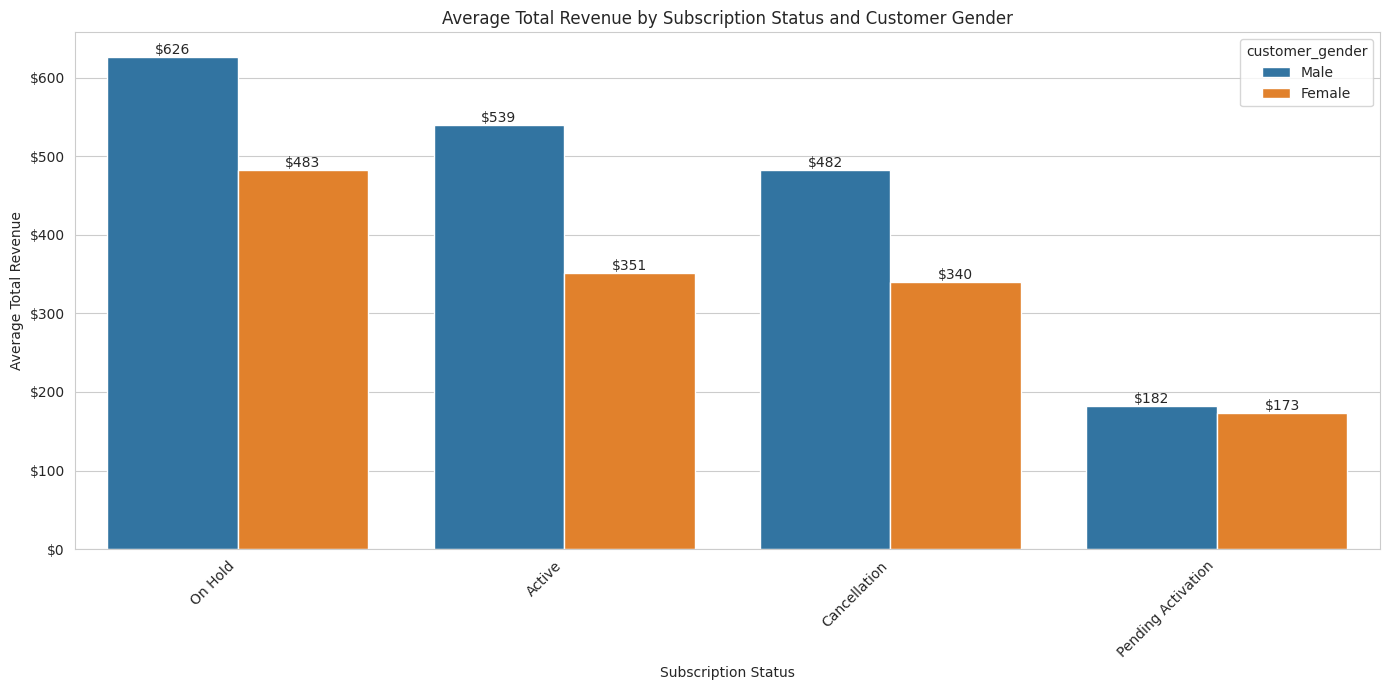

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import matplotlib.ticker as ticker # Import ticker for formatting

# Combine 'Pending-Activation' and 'Queued-Activation'
raw_df['subscription_status'] = raw_df['subscription_status'].replace('Queued-Activation', 'Pending Activation')
# Combine 'Cancelled' and 'Pending Cancellation'
raw_df['subscription_status'] = raw_df['subscription_status'].replace(['Cancelled', 'Pending Cancellation'], 'Cancellation')


# Calculate average total revenue by subscription status and customer gender
subscription_gender_revenue_analysis = raw_df.groupby(['subscription_status', 'customer_gender'])['total_revenue'].mean().reset_index()

# Calculate the overall average total revenue for each subscription status to use for sorting
overall_subscription_avg_revenue = subscription_gender_revenue_analysis.groupby('subscription_status')['total_revenue'].mean().sort_values(ascending=False)

# Create a grouped bar plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='subscription_status', y='total_revenue', hue='customer_gender', data=subscription_gender_revenue_analysis, order=overall_subscription_avg_revenue.index, hue_order=['Male', 'Female']) # Added hue_order
plt.title('Average Total Revenue by Subscription Status and Customer Gender')
plt.xlabel('Subscription Status')
plt.ylabel('Average Total Revenue')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels with thousands separators and a dollar sign
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add average revenue at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')

plt.tight_layout()
plt.show()

### Insights from Average Total Revenue by Subscription Status and Customer Gender

Based on the grouped bar plot of Average Total Revenue by Subscription Status and Customer Gender, we can observe the following:

*   Customers in the 'On Hold' subscription status have the highest average total revenue, followed by 'Active' and 'Cancellation'.
*   Across almost all subscription statuses, male customers tend to have a higher average total revenue compared to female customers.
*   The difference in average revenue between genders is most pronounced in the 'On Hold' and 'Active' statuses.
*   Customers in the 'Pending Activation' status have the lowest average total revenue for both genders.

These insights suggest that customers in 'On Hold' and 'Active' statuses, particularly males, are associated with higher average spending. Understanding the characteristics and behaviors of customers in the 'On Hold' status could be particularly valuable, as they represent a group with high average revenue despite not being currently active.

## 6. How Does Gender Distribution Vary by Acquisition Channel?

This section examines how the distribution of customer gender differs across various acquisition channels, helping to understand if certain channels are more effective at attracting a particular gender.

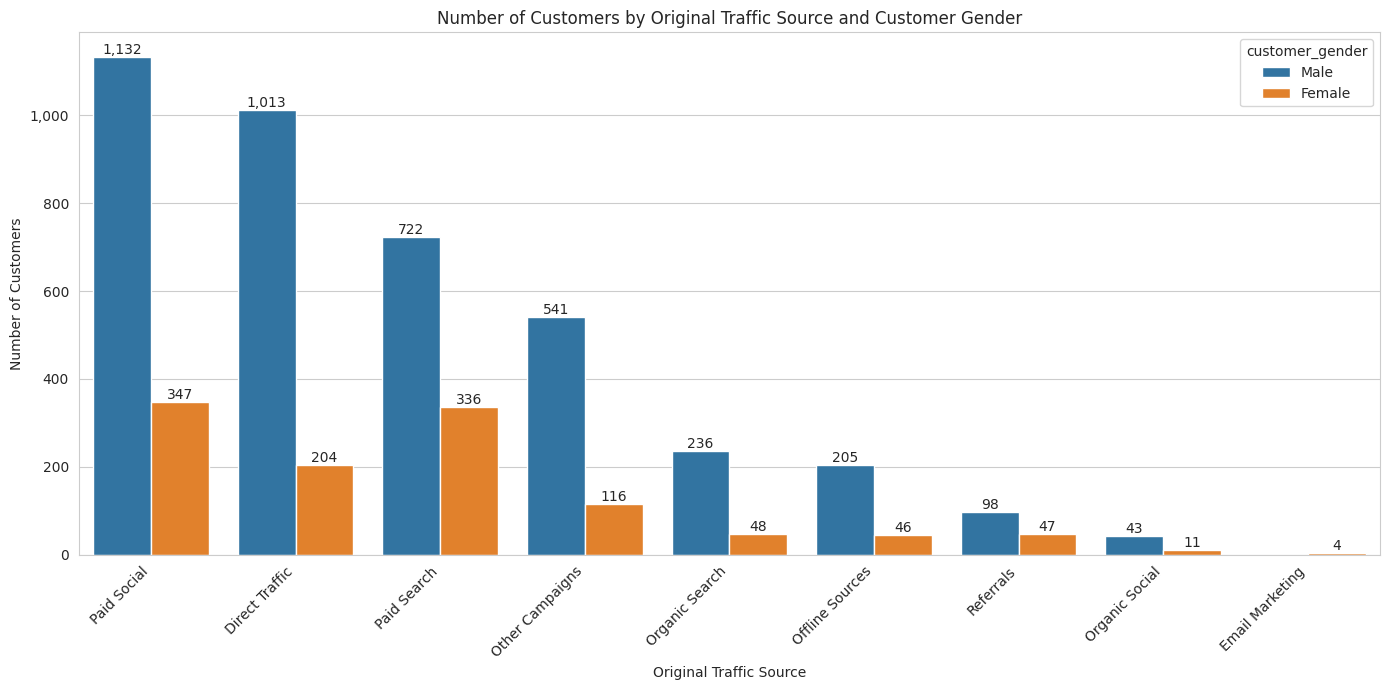

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import matplotlib.ticker as ticker # Import ticker for formatting

# Calculate the number of customers for each combination of original traffic source and gender
traffic_source_gender_counts = raw_df.groupby(['original_traffic_source', 'customer_gender']).size().reset_index(name='customer_count')

# Calculate the total number of customers for sorting purposes (optional, but helps order the main groups)
overall_traffic_source_counts = traffic_source_gender_counts.groupby('original_traffic_source')['customer_count'].sum().sort_values(ascending=False)

# Create a grouped bar plot of customer counts
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='original_traffic_source',
    y='customer_count',
    hue='customer_gender',
    data=traffic_source_gender_counts,
    order=overall_traffic_source_counts.index,
    hue_order=['Male', 'Female'] # Explicitly set hue order for consistency
)
plt.title('Number of Customers by Original Traffic Source and Customer Gender')
plt.xlabel('Original Traffic Source')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels with thousands separators
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add count labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.tight_layout()
plt.show()

### Insights from Number of Customers by Original Traffic Source and Customer Gender

Based on the grouped bar plot showing the number of customers by original traffic source and customer gender, we can observe the following:

*   The most popular original traffic sources in terms of customer acquisition are **Paid Social**, **Direct Traffic**, and **Paid Search**.
*   Within each original traffic source, the number of male customers is significantly higher than the number of female customers, consistent with the overall gender distribution in the dataset.
*   **Paid Social** attracts the largest number of both male and female customers among all traffic sources.
*   While male customers dominate across all channels, the relative proportion of female customers varies slightly across sources.

These insights help us understand which acquisition channels are most effective at attracting customers overall and highlight the consistent dominance of male customers across all channels. This information, combined with the revenue analysis for these sources, provides a more complete picture of the customer segments acquired through different channels.

## 7. Which Marketing Campaigns Are Most Profitable?

This section aims to analyze the performance of different marketing campaigns to identify those that are generating the most revenue and acquiring high-potential customers, allowing for optimization of marketing efforts.

In [ ]:
#import numpy as np
#import pandas as pd

# Define the conditions and corresponding values for grouping first_page_seen_content
conditions = [
    raw_df['first_page_seen_content'].isna(), # Explicitly check for NaN
    raw_df['first_page_seen_content'].str.contains('UGC', na=False),
    raw_df['first_page_seen_content'].str.contains('Holiday Flash', na=False),
    raw_df['first_page_seen_content'].str.contains('Carousel', na=False),
    raw_df['first_page_seen_content'].str.contains('Video - Dr W|Dr.W|Video - Cut Dr. Wolf', na=False), # Including new variations
    raw_df['first_page_seen_content'].str.contains('BlackFriday', na=False),
    raw_df['first_page_seen_content'].str.contains('CyberMonday', na=False),
    raw_df['first_page_seen_content'].str.contains('Single Image', na=False),
    raw_df['first_page_seen_content'].str.contains('Graphic Video', na=False),
    raw_df['first_page_seen_content'].str.contains('DDS_Static', na=False),
    raw_df['first_page_seen_content'].str.contains('Cutoff', na=False),
    raw_df['first_page_seen_content'].str.contains('BFCM', na=False),
    raw_df['first_page_seen_content'].str.contains('CM Extended', na=False),
    raw_df['first_page_seen_content'].str.contains('Video -', na=False), # Other Video
    raw_df['first_page_seen_content'].str.contains('Animated Image', na=False), # Animated Image
    raw_df['first_page_seen_content'].str.contains('DWT|Don\'t Waste Time', na=False), # Don't Waste Time
    raw_df['first_page_seen_content'].str.contains('Static', na=False), # Static
    raw_df['first_page_seen_content'].str.match(r'^[0-9]+$', na=False) # ID specific content (digits only)
]

values = [
    'None', # Assign 'None' for NaN values
    'UGC',
    'Holiday Flash',
    'Carousel',
    'Video Dr. W',
    'BlackFriday',
    'CyberMonday',
    'Single Image',
    'Graphic Video',
    'DDS_Static',
    'Cutoff',
    'BFCM',
    'CM Extended',
    'Other Video',
    'Animated Image',
    'Don\'t Waste Time',
    'Static',
    'ID specific content'
]

# Create the new grouped column using np.select
raw_df['first_page_seen_content_grouped'] = np.select(conditions, values, default='Other')


# Calculate total revenue, average revenue, and customer count for each grouped content category
grouped_content_analysis_pandas = raw_df.groupby('first_page_seen_content_grouped').agg(
    total_revenue=('total_revenue', 'sum'),
    average_total_revenue=('total_revenue', 'mean'),
    number_of_customers=('record_id', 'count')
).reset_index()

# Sort by average total revenue in descending order (matching the SQL query's order)
grouped_content_analysis_pandas = grouped_content_analysis_pandas.sort_values(by='average_total_revenue', ascending=False)

# Fill NaN values in revenue columns with 0 for formatting (if any resulted from grouping)
grouped_content_analysis_pandas['total_revenue'] = grouped_content_analysis_pandas['total_revenue'].fillna(0)
grouped_content_analysis_pandas['average_total_revenue'] = grouped_content_analysis_pandas['average_total_revenue'].fillna(0)


# Format the revenue and count columns
styled_grouped_content_analysis_pandas = grouped_content_analysis_pandas.style.format({
    'total_revenue': '${:,.2f}',
    'average_total_revenue': '${:,.2f}',
    'number_of_customers': '{:,.0f}'
})

display(styled_grouped_content_analysis_pandas)

,first_page_seen_content_grouped,total_revenue,average_total_revenue,number_of_customers
9,Graphic Video,"$8,149.30",$814.93,10
18,Video Dr. W,"$223,800.60",$678.18,331
0,Animated Image,"$4,866.75",$608.34,8
4,Carousel,"$296,046.25",$585.07,509
14,Other Video,"$9,273.25",$579.58,16
17,UGC,"$62,491.80",$553.02,114
15,Single Image,"$37,533.50",$514.16,73
12,None,"$1,516,675.73",$425.91,"3,683"
11,ID specific content,"$10,891.24",$403.38,29
13,Other,"$46,210.61",$391.62,135


### Insights from First Page Seen Content Analysis (Grouped)

Based on the `styled_grouped_content_analysis_pandas` table, which provides total revenue, average revenue per customer, and number of customers for each grouped first page seen content category, we can observe the following:

*   The 'None' category, representing **direct traffic**, accounts for the largest number of customers and the highest total revenue. However, it has a relatively lower average revenue per customer compared to some other groups. This suggests a large volume of customers who arrived directly, with potentially varied individual spending.
*   'Carousel' and 'Video Dr. W' content groups have high total revenue and a significant number of customers, indicating they are effective in both attracting customers and generating revenue.
*   Content types like 'Graphic Video', 'Animated Image', and 'Other Video' appear to have higher average revenue per customer, even though their total revenue and customer counts are lower. This might indicate that while they attract fewer customers, those customers tend to be higher-value.
*   Specific promotional content like 'BlackFriday', 'CyberMonday', 'BFCM', and 'CM Extended' show varying performance in terms of total revenue and customer count, with relatively lower average revenue per customer compared to some evergreen content types.
*   The 'ID specific content' group has a notable average revenue per customer despite a lower total revenue and customer count, which might warrant further investigation into what these specific IDs represent.

These insights highlight that different types of initial content have varying levels of effectiveness in terms of attracting customers, generating total revenue, and acquiring high-value customers (as indicated by average revenue). A balanced strategy might involve leveraging content types that bring in high volume ('None' representing direct traffic, 'Carousel', 'Video Dr. W') while also exploring and optimizing channels that attract high-average-revenue customers ('Graphic Video', 'Animated Image', 'Other Video', 'ID specific content').

## Revenue-Based Segmentation

This section focuses on segmenting customers based on their total revenue to identify high-value customer segments.

In [ ]:
# Drop rows with missing 'total_revenue' for revenue segmentation
revenue_df = raw_df.dropna(subset=['total_revenue']).copy()

# Define revenue tiers (you can adjust the quantiles or define custom bins)
revenue_quantiles = revenue_df['total_revenue'].quantile([0.25, 0.5, 0.75]).to_dict()

def revenue_tier(revenue):
    if revenue <= revenue_quantiles[0.25]:
        return 'Low Revenue'
    elif revenue <= revenue_quantiles[0.5]:
        return 'Medium Revenue'
    elif revenue <= revenue_quantiles[0.75]:
        return 'High Revenue'
    else:
        return 'Very High Revenue'

revenue_df['Revenue_Tier'] = revenue_df['total_revenue'].apply(revenue_tier)

# Display the count of customers in each revenue tier
display(revenue_df['Revenue_Tier'].value_counts())

# Analyze characteristics of each revenue tier (optional)
# For example, average recency or frequency for each tier

,count
Revenue_Tier,
Low Revenue,1548
Very High Revenue,1277
High Revenue,1266
Medium Revenue,1016


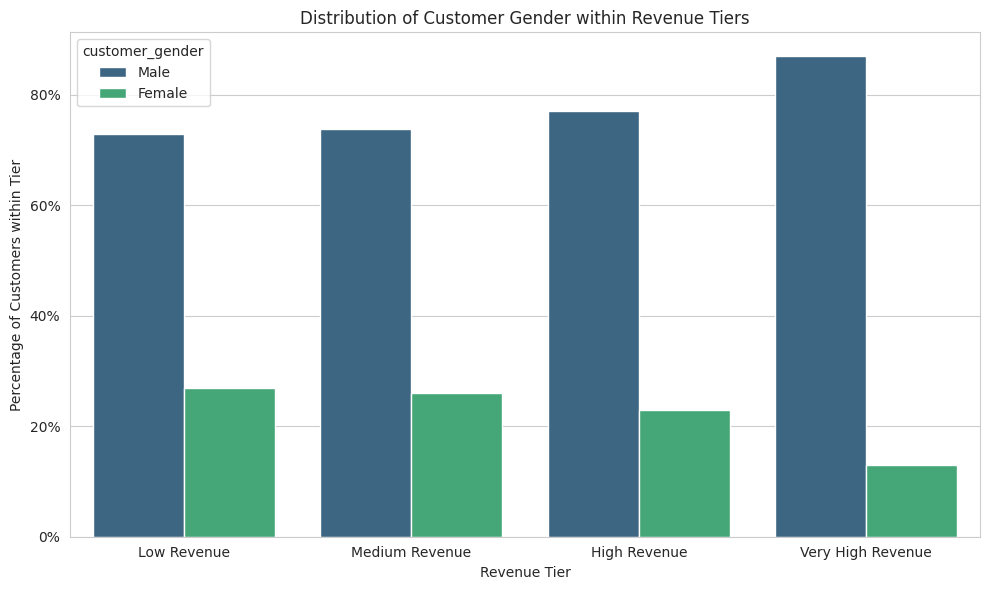

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # Import ticker for formatting

# Analyze the distribution of Customer Gender within each Revenue Tier
revenue_tier_gender = revenue_df.groupby(['Revenue_Tier', 'customer_gender']).size().reset_index(name='customer_count')

# Calculate the percentage within each Revenue Tier
total_customers_in_tier_gender = revenue_tier_gender.groupby('Revenue_Tier')['customer_count'].transform('sum')
revenue_tier_gender['percentage_within_tier'] = (revenue_tier_gender['customer_count'] / total_customers_in_tier_gender) * 100

# Order Revenue Tiers for plotting
revenue_tier_gender['Revenue_Tier'] = pd.Categorical(revenue_tier_gender['Revenue_Tier'], categories=revenue_tier_order, ordered=True)
revenue_tier_gender = revenue_tier_gender.sort_values('Revenue_Tier')

# Sort within each revenue tier by percentage for plotting
revenue_tier_gender = revenue_tier_gender.sort_values(['Revenue_Tier', 'percentage_within_tier'], ascending=[True, False])


# Plot the distribution of Customer Gender within each Revenue Tier
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Revenue_Tier', y='percentage_within_tier', hue='customer_gender', data=revenue_tier_gender, palette='viridis', dodge=True) # Added dodge=True for clarity
plt.title('Distribution of Customer Gender within Revenue Tiers')
plt.xlabel('Revenue Tier')
plt.ylabel('Percentage of Customers within Tier')

# Format the y-axis labels as percentages
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())


plt.tight_layout()
plt.show()

### Insights from Distribution of Customer Gender within Revenue Tiers

Based on the bar plot Customer Gender within Revenue Tiers, we can observe the following:

*   **Customer Gender:**
    *   Across all revenue tiers, the proportion of **Male** customers is significantly higher than **Female** customers, consistent with the overall gender distribution in the dataset.
    *   The dominance of male customers is most pronounced in the **Very High Revenue** tier, where they represent a larger percentage compared to the lower revenue tiers.
    *   While male customers are the majority in all tiers, understanding the specific characteristics and behaviors within each gender group within the high-revenue tiers could provide further insights for targeted marketing.

These insights highlight the strong representation of male customers across all revenue tiers, particularly in the higher-spending segments.

## Overall Insights and Recommendations

Based on the exploratory data analysis, we have gained valuable insights into customer characteristics and acquisition channels that can help identify high-potential customers:

**Key Insights:**

*   **Traffic Source Profitability:** Paid Social, Direct Traffic, and Paid Search are the most profitable original traffic sources in terms of total revenue. Paid Social and Direct Traffic also show high average revenue per customer.
*   **First Page Seen Content Effectiveness:** Direct traffic (categorized as 'None' in the content analysis), 'Carousel', and 'Video Dr. W' are associated with high total revenue. However, content types like 'Graphic Video', 'Animated Image', and 'Other Video' show higher average revenue per customer, suggesting they attract higher-value customers despite lower volume.
*   **Customer Gender Distribution:** The customer base is heavily skewed towards male customers.
*   **Subscription Status and Revenue:** Customers in 'On Hold' and 'Active' statuses, particularly males, are associated with higher average spending.

**Recommendations:**

*   **Focus on High-Performing Channels:** Continue investing in and optimizing campaigns within Paid Social, Direct Traffic, and Paid Search to maximize overall revenue and acquire high-value customers.
*   **Optimize Content Strategy:** While high-volume content like 'Carousel' and 'Video Dr. W' are effective for broad reach and total revenue, explore strategies to increase traffic from content types associated with higher average revenue per customer ('Graphic Video', 'Animated Image', 'Other Video', 'ID specific content').
*   **Tailor Marketing to Gender Distribution:** Given the dominance of male customers, ensure marketing messages and channels are effective in reaching and engaging this demographic. Consider exploring opportunities to attract more female customers if it aligns with business goals and profitability analysis.
*   **Engage 'On Hold' Customers:** The 'On Hold' status represents a significant group with high average revenue. Develop targeted strategies to re-engage these customers and encourage them to become active subscribers again. Understanding the reasons for their 'On Hold' status is crucial.
*   **Further Investigate High-Average-Revenue Segments:** Conduct deeper analysis into the characteristics and behaviors of customers acquired through channels or interacting with content types that show high average revenue per customer, even if the volume is lower. This can help refine the definition of a "high-potential customer."
*   **Utilize Click ID Data:** Explore the `facebook_click_id` and `google_click_id` data (after appropriate cleaning and handling) to potentially link specific ad campaigns to customer behavior and revenue, providing more granular insights into advertising effectiveness.
*   **Analyze Customer Journey:** Investigate the sequence of interactions (e.g., `first_page_seen`, `last_activity_timestamp`, order dates) to understand the customer journey and identify touchpoints that are most indicative of future high value.

By implementing these recommendations, the business can better identify, acquire, and retain high-potential customers, leading to increased profitability and sustainable growth.